In [ ]:
## Ftc-2023

In [ ]:
#!pip install --upgrade protobuf

In [1]:
import numpy
numpy.version.version

'1.24.4'

In [ ]:
!pip3 uninstall numpy && install numpy==1.23.5

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.8
    /usr/local/lib/python3.8/dist-packages/numpy-1.23.5.dist-info/*
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.8/dist-packages/numpy/*
Proceed (Y/n)? 

In [2]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [3]:
# Model

In [4]:
spec = model_spec.get('efficientdet_lite2')

2023-11-09 23:24:20.856771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-09 23:24:20.900081: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-09 23:24:20.900563: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-09 23:24:20.904508: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

In [19]:
ROOT_PATH="/tf28-opencv-main/src/traning"


In [20]:
#Data
train_data = object_detector.DataLoader.from_pascal_voc(os.path.join(ROOT_PATH,"ftc-2023.v1i.voc/train"), os.path.join(ROOT_PATH,"ftc-2023.v1i.voc/train"), ['blue-prop', 'red-prop', 'team-prop'])

In [21]:
validation_data = object_detector.DataLoader.from_pascal_voc(os.path.join(ROOT_PATH,"ftc-2023.v1i.voc/test"), os.path.join(ROOT_PATH,"ftc-2023.v1i.voc/test"), ['blue-prop', 'red-prop', 'team-prop'])

In [14]:
os.path.exists(os.path.join(ROOT_PATH,"ftc-2023.v1i.voc/valid"))

False

In [15]:
os.getcwd()

'/tf28-opencv-main/src'

In [11]:
# Step 3. Train the TensorFlow model with the training data.

In [22]:
model = object_detector.create(train_data, model_spec=spec, epochs=80, batch_size=8, train_whole_model=True, validation_data=validation_data)

Epoch 1/80


2023-11-10 02:05:07.380771: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200


1/1 [==============================] - 22s 22s/step - det_loss: 1.7874 - cls_loss: 1.1592 - box_loss: 0.0126 - reg_l2_loss: 0.0760 - loss: 1.8634 - learning_rate: 0.0080 - gradient_norm: 1.2924
Epoch 2/80
1/1 [==============================] - 1s 807ms/step - det_loss: 1.7619 - cls_loss: 1.1734 - box_loss: 0.0118 - reg_l2_loss: 0.0760 - loss: 1.8379 - learning_rate: 0.0100 - gradient_norm: 1.5903
Epoch 3/80
1/1 [==============================] - 1s 1s/step - det_loss: 1.7801 - cls_loss: 1.1659 - box_loss: 0.0123 - reg_l2_loss: 0.0760 - loss: 1.8561 - learning_rate: 0.0100 - gradient_norm: 1.2572
Epoch 4/80
1/1 [==============================] - 1s 950ms/step - det_loss: 1.7313 - cls_loss: 1.1609 - box_loss: 0.0114 - reg_l2_loss: 0.0760 - loss: 1.8073 - learning_rate: 0.0100 - gradient_norm: 1.3508
Epoch 5/80
1/1 [==============================] - 1s 916ms/step - det_loss: 1.6724 - cls_loss: 1.1519 - box_loss: 0.0104 - reg_l2_loss: 0.0760 - loss: 1.7484 - learning_rate: 0.0099 - gradien

1/1 [==============================] - 1s 923ms/step - det_loss: 0.8167 - cls_loss: 0.6026 - box_loss: 0.0043 - reg_l2_loss: 0.0760 - loss: 0.8927 - learning_rate: 0.0051 - gradient_norm: 2.2186
Epoch 41/80
1/1 [==============================] - 1s 945ms/step - det_loss: 0.6573 - cls_loss: 0.4824 - box_loss: 0.0035 - reg_l2_loss: 0.0760 - loss: 0.7333 - learning_rate: 0.0049 - gradient_norm: 1.4988
Epoch 42/80
1/1 [==============================] - 1s 934ms/step - det_loss: 0.8836 - cls_loss: 0.5947 - box_loss: 0.0058 - reg_l2_loss: 0.0760 - loss: 0.9597 - learning_rate: 0.0047 - gradient_norm: 2.3734
Epoch 43/80
1/1 [==============================] - 1s 1s/step - det_loss: 0.6859 - cls_loss: 0.5249 - box_loss: 0.0032 - reg_l2_loss: 0.0760 - loss: 0.7619 - learning_rate: 0.0045 - gradient_norm: 2.0452
Epoch 44/80
1/1 [==============================] - 1s 845ms/step - det_loss: 0.6383 - cls_loss: 0.4599 - box_loss: 0.0036 - reg_l2_loss: 0.0760 - loss: 0.7143 - learning_rate: 0.0043 - gr

1/1 [==============================] - 1s 1s/step - det_loss: 0.7656 - cls_loss: 0.5263 - box_loss: 0.0048 - reg_l2_loss: 0.0760 - loss: 0.8416 - learning_rate: 3.9530e-06 - gradient_norm: 2.7881
Epoch 80/80
1/1 [==============================] - 1s 962ms/step - det_loss: 0.5311 - cls_loss: 0.4018 - box_loss: 0.0026 - reg_l2_loss: 0.0760 - loss: 0.6071 - learning_rate: 0.0000e+00 - gradient_norm: 1.4663


In [23]:
# Step 4. Evaluate the model with the test data

In [24]:
model.evaluate(validation_data)

1/1 [==============================] - 3s 3s/step



{'AP': 0.1,
 'AP50': 1.0,
 'AP75': 0.0,
 'APs': -1.0,
 'APm': -1.0,
 'APl': 0.1,
 'ARmax1': 0.1,
 'ARmax10': 0.1,
 'ARmax100': 0.1,
 'ARs': -1.0,
 'ARm': -1.0,
 'ARl': 0.1,
 'AP_/blue-prop': 0.1,
 'AP_/red-prop': -1.0,
 'AP_/team-prop': -1.0}

In [26]:
##Step 5.  Export as a TensorFlow Lite model.**

In [27]:
model.export(export_dir='.')

2023-11-10 02:07:51.667870: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2023-11-10 02:08:05.330026: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'resample_p7/PartitionedCall' has 1 outputs but the _output_shapes attribute specifies shapes for 3 outputs. Output shapes may be inaccurate.
2023-11-10 02:08:08.974308: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2023-11-10 02:08:08.974338: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2023-11-10 02:08:08.974786: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpfdekh39t
2023-11-10 02:08:09.043709: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2023-11-10 02:08:09.043738: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if pre

In [28]:
#Step 6. Evaluate the TensorFlow Lite model.

In [30]:
model.evaluate_tflite('model.tflite', validation_data)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


1/1 [==============================] - 1s 586ms/step



{'AP': 0.0,
 'AP50': 0.0,
 'AP75': 0.0,
 'APs': -1.0,
 'APm': -1.0,
 'APl': 0.0,
 'ARmax1': 0.0,
 'ARmax10': 0.0,
 'ARmax100': 0.0,
 'ARs': -1.0,
 'ARm': -1.0,
 'ARl': 0.0,
 'AP_/blue-prop': 0.0,
 'AP_/red-prop': -1.0,
 'AP_/team-prop': -1.0}

In [31]:
#(Optional) Test the TFLite model on your image

In [32]:
import cv2

from PIL import Image

model_path = 'model.tflite'

# Load the labels into a list
classes = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
  classes[label_id-1] = label_name

# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  return resized_img, original_image


def set_input_tensor(interpreter, image):
  """Set the input tensor."""
  tensor_index = interpreter.get_input_details()[0]['index']
  input_tensor = interpreter.tensor(tensor_index)()[0]
  input_tensor[:, :] = image


def get_output_tensor(interpreter, index):
  """Retur the output tensor at the given index."""
  output_details = interpreter.get_output_details()[index]
  tensor = np.squeeze(interpreter.get_tensor(output_details['index']))
  return tensor


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""
  # Feed the input image to the model
  set_input_tensor(interpreter, image)
  interpreter.invoke()

  # Get all outputs from the model
  scores = get_output_tensor(interpreter, 0)
  boxes = get_output_tensor(interpreter, 1)
  count = int(get_output_tensor(interpreter, 2))
  classes = get_output_tensor(interpreter, 3)

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

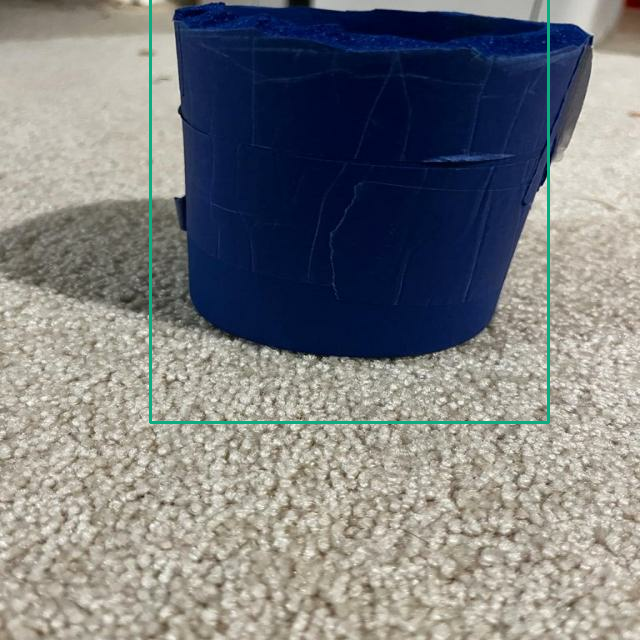

In [33]:
INPUT_IMAGE_URL = os.path.join(ROOT_PATH,"ftc-2023.v1i.voc/valid/blue-01_jpeg.rf.4da771ccb38fb5acb3b4fd3f1fab8c98.jpg")
DETECTION_THRESHOLD = 0.5

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    INPUT_IMAGE_URL,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)